# 🛒 Exploratory analysis 

|   |   |
|---|---|
| Project  |    [Segmentation des clients d'un site e-commerce](#https://openclassrooms.com/fr/paths/148/projects/630/assignment)         |
| Date   |    January 2023  |
| Autor  | Ana Bernal                                                   |
| Data source | https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce |
| Mentor | Samir Tanfous | 
| Notebook number  | 1 over 3                                                    |

**Description:** In this notebook we explore the databases from the e-commerce site. Some general statistics and we merge everything into a single dataframe.


# Table of contents
- [Preliminaries](#Preliminaries)
  - [Libraries](#Libraries)
  - [Graphics](#Graphics)
  - [Data](#Data)
- [Data overview and exploration](#Data-overview-and-exploration)
- [Merge, join, aggregation](#Merge,-join,-aggregation)
    - [1. Start with `data['orders']`](#1.-Start-with-`data['orders']`)
    - [2. Merge with `data['customers']`](#2.-Merge-with-`data['customers']`)
    - [3. Merge with `data['order-reviews']`](#3.-Merge-with-`data['order-reviews']`)
    - [4. Merge with `data['order-items']`](#4.-Merge-with-`data['order-items']`)
    - [5. Merge with `data['order-payments']`](#5.-Merge-with-`data['order-payments']`)
    - [6. Merge with `data['products']` and translation from portuguese](#6.-Merge-with-`data['products']`-and-translation-from-portuguese)
    - [7. Merge with `data['sellers']`](#7.-Merge-with-`data['sellers']`)
    - [8. Merge with `data['geolocation']`](#8.-Merge-with-`data['geolocation']`)
    - [Turning columns into pandas.datetime](#Turning-columns-into-pandas.datetime)
  - [Aggregation (group by)](#Aggregation-(group-by))
    - [Group by unique customer](#Group-by-unique-customer)
      - [Step 1: Aggregate](#Step-1:-Aggregate)
      - [Step 2: join](#Step-2:-join)
- [Obtained dataframe review](#Obtained-dataframe-review)
- [Cleaning](#Cleaning)
  - [Review of extreme values](#Review-of-extreme-values)
  - [Missing values](#Missing-values)
- [Correlations](#Correlations)
- [Creation of some variables](#Creation-of-some-variables)
- [Export data](#Export-data)

# Preliminaries

## Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# for reading html tables from Wikipedia
from unicodedata import normalize

# for normalizing text with accents, tildas, etc
from unidecode import unidecode

## Graphics

In [3]:
sns.set()

## Data

For this project we have 9 different datasets that we will merge later. Let us first have a look at the different datasets.

In [4]:
import os 

data_path = './data/source/'
data = {}
filenames = os.listdir(path=data_path)

for name in filenames:
    key = name.split('_')[1]
    data[key] = pd.read_csv(data_path + name)

print('The different dataframes are:',
      '\n' + '-'*40)
for key in data.keys():
    print('- ' + key)



The different dataframes are: 
----------------------------------------
- geolocation
- order-reviews
- translation-category
- customers
- products
- sellers
- order-items
- order-payments
- orders


# Data overview and exploration

Let us display the list of columns for each different dataset

In [5]:
print(' '*15 +'Les colonnes dans chaque tableau sont :',
      '\n' + '#'*70)

for idx,key in enumerate(data.keys()):
    print(f'dataframe: ({idx+1}/{len(data.keys())}) \n  ' + key,
          '\ncolumns :')
    i=0
    cols = data[key].columns.tolist()
    while i <= len(cols)-1:
      if i == len(cols)-1:
            print('  ',cols[i])
      else:
            print('  ',cols[i],',', cols[i+1],',')
      if i+1 == len(cols)-1:
            i += 1
      else:
            i += 2
    print('='*70)
    

               Les colonnes dans chaque tableau sont : 
######################################################################
dataframe: (1/9) 
  geolocation 
columns :
   geolocation_zip_code_prefix , geolocation_lat ,
   geolocation_lng , geolocation_city ,
   geolocation_state
dataframe: (2/9) 
  order-reviews 
columns :
   review_id , order_id ,
   review_score , review_comment_title ,
   review_comment_message , review_creation_date ,
   review_answer_timestamp
dataframe: (3/9) 
  translation-category 
columns :
   product_category_name , product_category_name_english ,
   product_category_name_english
dataframe: (4/9) 
  customers 
columns :
   customer_id , customer_unique_id ,
   customer_zip_code_prefix , customer_city ,
   customer_state
dataframe: (5/9) 
  products 
columns :
   product_id , product_category_name ,
   product_name_lenght , product_description_lenght ,
   product_photos_qty , product_weight_g ,
   product_length_cm , product_height_cm ,
   product_width_cm
d

We display an overview of each table, to make a more detailed overview of the information in each table later.

In [5]:
# Printing a preview of each dataframe
for idx,key in enumerate(data.keys()):
    print(f'df ({idx+1}/{len(data.keys())})','**', key, '**')
    display(data[key].sample(3))

df (1/9) ** geolocation **


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
641049,38030,-19.767654,-47.928533,uberaba,MG
461518,23010,-22.890172,-43.521135,rio de janeiro,RJ
19885,2039,-23.493368,-46.621798,são paulo,SP


df (2/9) ** order-reviews **


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
57045,4a028d1cd4e952654c0f77e39e08d80f,121191d52387cd00dc63011edaeb8af2,3,NaN,"Boa tarde, o correio retornou com o meu produt...",2017-11-23 00:00:00,2017-11-23 15:53:41
77860,4685121c8eaf0f9eea37cc2e81cb9bd8,6de5cb2a6bbde83681d778ff903220e2,3,NaN,NaN,2018-01-05 00:00:00,2018-01-08 09:53:53
6959,682fe633e670da67629bc9e9b6a40217,c68531b87a0e5baf9b8f526ec20d04e5,4,NaN,NaN,2017-09-16 00:00:00,2017-09-18 18:38:28


df (3/9) ** translation-category **


,product_category_name,product_category_name_english
5,esporte_lazer,sports_leisure
13,tablets_impressao_imagem,tablets_printing_image
15,telefonia_fixa,fixed_telephony


df (4/9) ** customers **


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
82138,aa205b10893ed2b1a174c2c830778224,53d7110d90950f5cddd3265216eb3edf,60320,fortaleza,CE
1266,bb057009d6f61e78d6199046a4150cb3,80751f3256e9ecc03c4556904f6d72c8,66080,belem,PA
30793,614f4db4fc76b38bf6691690a5c87dcf,3b0bb03a1592b488c3a77d5f6ddc06ac,88310,itajai,SC


df (5/9) ** products **


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
19779,a929e5cc2191b78c668771531cb7d277,esporte_lazer,40.0,851.0,1.0,450.0,20.0,20.0,20.0
3149,cb7c5ecc59b4812139816ae4fca6fc5c,beleza_saude,37.0,377.0,1.0,5400.0,38.0,18.0,22.0
12058,3581206bcfdc0f2611c3d1e8edb87719,esporte_lazer,28.0,829.0,1.0,2300.0,23.0,11.0,11.0


df (6/9) ** sellers **


,seller_id,seller_zip_code_prefix,seller_city,seller_state
2217,269c5fc9fcadee614364c3620c30a1f9,7140,guarulhos,SP
1660,6eeed17989b0ae47c9f11ece6f38ea90,4123,sao paulo,SP
122,9d39404483343dd55c7ae254494d8388,1044,sao paulo,SP


df (7/9) ** order-items **


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
23201,34f1e1534ff3a9055146407b5fc8e790,1,d3c044bd42d84a79e3b0c42662806a48,4c2b230173bb36f9b240f2b8ac11786e,2017-09-28 02:15:50,25.9,7.78
47958,6cff9244ac14a30d55f39722cf7febe9,1,fad5712458efaf9fff0c29431c558b07,fa1c13f2614d7b5c4749cbc52fecda94,2018-08-23 10:50:27,198.9,8.65
19825,2d816b6a11ddd3843f307d1333321091,1,4c82c8d31845d751d797debc3d03697f,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-28 19:06:03,18.9,7.78


df (8/9) ** order-payments **


,order_id,payment_sequential,payment_type,payment_installments,payment_value
81823,fa94c44f1539dcab4c8b936951d319d6,1,credit_card,4,105.94
58192,6feeca05362a431b585a63a6043e7c1c,1,voucher,1,122.27
101256,5b81d7f0f897982fce8bd000471c973a,1,boleto,1,67.96


df (9/9) ** orders **


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
38275,d2621e5ff64aedbbc297e323fc18bfe6,ec197c15f97c64139e0c62e7a358ff87,delivered,2018-03-15 00:05:18,2018-03-15 16:36:00,2018-03-16 19:19:43,2018-05-04 15:53:58,2018-04-17 00:00:00
19326,05a2d609ab3024701d66a27590ea1d68,12f985f830e8fc3be0aad2ea7c47b612,delivered,2018-03-17 12:46:56,2018-03-17 17:57:32,2018-03-19 23:03:17,2018-03-26 22:42:08,2018-04-13 00:00:00
66377,07f6947cb721727031402e0cd6d6e5e9,0b169717fec8c12a53790ce862ee480c,delivered,2018-08-07 21:34:23,2018-08-07 21:45:19,2018-08-08 14:09:00,2018-08-13 18:08:35,2018-08-24 00:00:00


For studying the different sizes and number of missing values in each dataframe, we create the following table.

In [6]:
# Dictionary of general information on each dataframe
data_info = {'name' : [],
             'numb_rows' : [],
             'numb_cols': [],
             'isna_cols_list' : [],
             'isna_cols_perc' : []
             }

# Creating dataframe with general info on each dataframe
for key in data.keys():
    df = data[key]

    data_info['name'].append(key)
    data_info['numb_rows'].append(df.shape[0])
    data_info['numb_cols'].append(df.shape[1])

    # Calculating percentage of missing values in df
    isna_list = round((df.isna().sum()*100)/len(df),2)

    # Indexes from previous list where isna != 0
    idx = np.nonzero(isna_list.tolist())[0]

    # Labels of columns of df with missing values
    isna_names = [isna_list.index.tolist()[id] for id in idx]

    # Percentages of missing values in each of these cols.
    isna_perc = [p for p in isna_list if p]
    
    data_info['isna_cols_list'].append(isna_names)
    data_info['isna_cols_perc'].append(isna_perc)

df = pd.DataFrame(data_info).set_index('name')

# Printing info about displayed dataframe
print('General info on each dataframe :\n',
      'Each column of the table is explained here'
      '\n' + '-'*60,
      '\nname : Name of dataframe',
      '\nnumb_rows : number of rows',
      '\nnumb_cols : number of columns',
      '\nisna_cols_list: labels of columns with  missing data',
      '\nisna_cols_list: % of missing data')

# display dataframe
display(df)

General info on each dataframe :
 Each column of the table is explained here
------------------------------------------------------------ 
name : Name of dataframe 
numb_rows : number of rows 
numb_cols : number of columns 
isna_cols_list: labels of columns with  missing data 
isna_cols_list: % of missing data


,numb_rows,numb_cols,isna_cols_list,isna_cols_perc
name,,,,
geolocation,1000163,5,[],[]
order-reviews,99224,7,"[review_comment_title, review_comment_message]","[88.34, 58.7]"
translation-category,71,2,[],[]
customers,99441,5,[],[]
products,32951,9,"[product_category_name, product_name_lenght, p...","[1.85, 1.85, 1.85, 1.85, 0.01, 0.01, 0.01, 0.01]"
sellers,3095,4,[],[]
order-items,112650,7,[],[]
order-payments,103886,5,[],[]
orders,99441,8,"[order_approved_at, order_delivered_carrier_da...","[0.16, 1.79, 2.98]"


## Exploration of some data before join

Let us make an exploration of each dataframe one by one. This will help us understand the global information in the data.

### Geolocation


In [7]:
df = data['geolocation']

In the following map where we took a sample of 1,000 (out of 1,000,000) individuals, we can see that indeed they are all in Brazil. In this table we have locations of customers and sellers too.

In [8]:
import plotly.express as px
fig = px.scatter_geo(data_frame= df.sample(10000), 
                     lat = 'geolocation_lat',
                     lon = 'geolocation_lng',
                     scope = 'world'
                     )
fig.show()

### Customers

Let's verify that indeed (as mentioned on the project) only **3% of customers have made multiple** (more than one) purchases.

* Purchases are in the dataframe `data['orders']` which containts the customer id in `'customer_id'`.
* This `'customer_id'` is also in the dataframe `data['customers']` which contains `'customer_id'` and `'customer_unique_id'`.

As illustrated in:

<p align="center">
  <img src="fig1_orders_cust.png" />
</p>


Let's verify concretely : 

* The number of unique `customer_id` and `customer_unique_id`. Their difference must be equal to:
* the number of unique `customer_unique_id` duplicated in `data['customers']` and `data['orders']`.

In [9]:
n = data['customers']['customer_id'].unique().shape[0]
print(f"n = Number of unique customer_id in data['customers']: {n}")

m = data['orders']['customer_id'].unique().shape[0]
print(f"m = Number of unique customer_id in data['orders']: {m}")

l = data['customers']['customer_unique_id'].unique().shape[0]
print(f"l = Number of unique customer_unique_id in data['customers']: {l}")

print(f'n - l = {n-l}')

p = data['customers'].duplicated(subset='customer_unique_id', keep='first').sum()
print(f"Number of unique customer_unique_id duplicated in (calcul avec .duplicated()): {p}")
print("-"*70)
print(f"--> Percentage of clients with more than one purchase : {((p/l)*100).round(2)} %")

n = Number of unique customer_id in data['customers']: 99441
m = Number of unique customer_id in data['orders']: 99441
l = Number of unique customer_unique_id in data['customers']: 96096
n - l = 3345
Number of unique customer_unique_id duplicated in (calcul avec .duplicated()): 3345
----------------------------------------------------------------------
--> Percentage of clients with more than one purchase : 3.48 %


#### Origin state of customers

We can see in the following graph, which shows the percentage the origin state of customers, that over 40% of the customers are in the state of São Paulo (SP). They are followed by customers in the state of Rio de Janeiro (RJ) with more than 10%.

In [10]:
# Definint dataframes for plot
df = data['customers']
dfs = data['sellers']

# Keeping only non duplicates for customer_unique_id
df = df[df.duplicated(subset='customer_unique_id', keep='first')]

# Selection of more represented states
## for customers
all_states = df['customer_state'].unique().tolist()
selected_states = []
## for sellers
all_states_s = dfs['seller_state'].unique().tolist()
selected_states_s = []

for state in all_states:
    nb_cust_state = df.loc[df['customer_state'] == state].shape[0]
    perc = round((nb_cust_state/df.shape[0])*100,2)
    if perc >= 2:
        selected_states.append(state)

for state in all_states_s:
    nb_cust_state = dfs.loc[dfs['seller_state'] == state].shape[0]
    perc = round((nb_cust_state/df.shape[0])*100,2)
    if perc >= 2:
        selected_states_s.append(state)


df = df.loc[df['customer_state'].isin(selected_states) == True]
dfs = dfs.loc[dfs['seller_state'].isin(selected_states_s) == True]

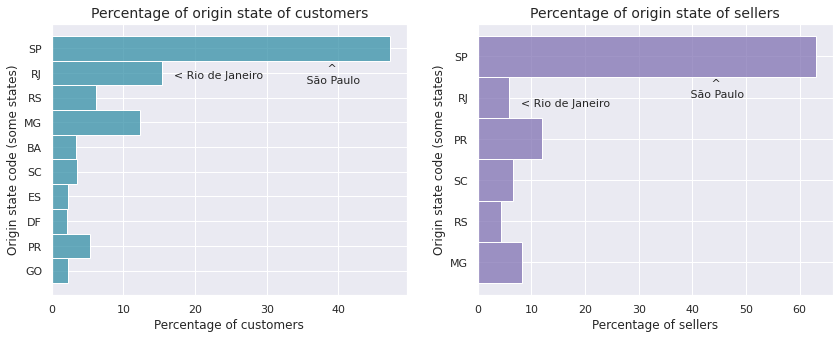

In [11]:
# Plotting bar chart
fig = plt.figure(figsize = (14,5))

ax = fig.add_subplot(1,2,1)
hist = sns.histplot(y = df['customer_state'],
             stat='percent',
             color=sns.color_palette('mako')[3], ax=ax) 
plt.text(35,1.4, '       ^    \n São Paulo', fontdict={'size':11})
plt.text(17,1.2, '< Rio de Janeiro', fontdict={'size':11})
plt.title('Percentage of origin state of customers', fontsize=14)
plt.xlabel('Percentage of customers')
plt.ylabel('Origin state code (some states)')

ax = fig.add_subplot(1,2,2)
hist = sns.histplot(y = dfs['seller_state'],
             stat='percent',
             color=sns.color_palette()[4], ax=ax) 

             
plt.text(39,1, '       ^    \n São Paulo', fontdict={'size':11})
plt.text(8,1.2, '< Rio de Janeiro', fontdict={'size':11})
plt.title('Percentage of origin state of sellers', fontsize=14)
plt.xlabel('Percentage of sellers')
plt.ylabel('Origin state code (some states)')
plt.show()

### Order reviews

Let us study the distribution of the reviews scores

In [12]:
df = data['order-reviews']

There are 814 duplicated review_id. After observations of some of these, we see that all columns are the same except for order_id : a same review_id can have many order_id. We decide then to keep the first observation.

In [13]:
# dataframe for ploting
df = df.loc[df.duplicated(subset='review_id', keep='first')]

count_df = df.groupby('review_score').size().reset_index(name='counts')
# count_df['perc'] = ((count_df['counts']/df.shape[0])*100).round()
count_df

,review_score,counts
0,1,142
1,2,37
2,3,82
3,4,135
4,5,418


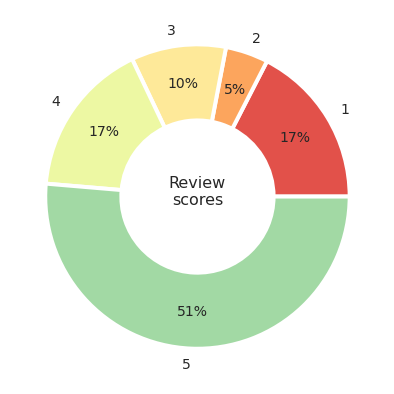

In [14]:
# plotting pie chart
fig = plt.figure(figsize=(7,7))

plt.pie(count_df['counts'], 
        labels = count_df['review_score'], 
        colors=sns.color_palette('Spectral'),
        wedgeprops = {'width': 0.5, 'linewidth': 4},
        autopct='%.0f%%',
        pctdistance=0.75,
        textprops={'size':14},
        labeldistance=1.1,
        # explode = (0.05,0.05,0.05,0.05,0.05)
        )

fontdict = {'size' : 16,
           'horizontalalignment' : 'center'}
plt.text(0,-0.05,'Review\nscores', fontdict = fontdict)

# plt.title('    Percentages of review scores', fontsize=15)

plt.show()

### Products

Let us study the distribution and quantities of different catégories of products. For this, we take a sample of the products sorted decreasingly by number of products per category.

In [15]:
df = data['products']

For plotting we create a dataframe for finding the categories with the bigger number of products:

In [16]:
# dataframe counting number of products per category
# and percentage
count_df = df.groupby('product_category_name').size().reset_index(name='counts')
count_df['perc'] = ((count_df['counts']/df.shape[0])*100).round()

# sample of categories with the greater number of products
df_lil = count_df.sort_values(by='counts', ascending=False).head(15)

# merge to traduce the name of the categories
other = data['translation-category']
df_plot = df_lil.merge(other, on ='product_category_name', how='left')

df_plot

,product_category_name,counts,perc,product_category_name_english
0,cama_mesa_banho,3029,9.0,bed_bath_table
1,esporte_lazer,2867,9.0,sports_leisure
2,moveis_decoracao,2657,8.0,furniture_decor
3,beleza_saude,2444,7.0,health_beauty
4,utilidades_domesticas,2335,7.0,housewares
5,automotivo,1900,6.0,auto
6,informatica_acessorios,1639,5.0,computers_accessories
7,brinquedos,1411,4.0,toys
8,relogios_presentes,1329,4.0,watches_gifts
9,telefonia,1134,3.0,telephony


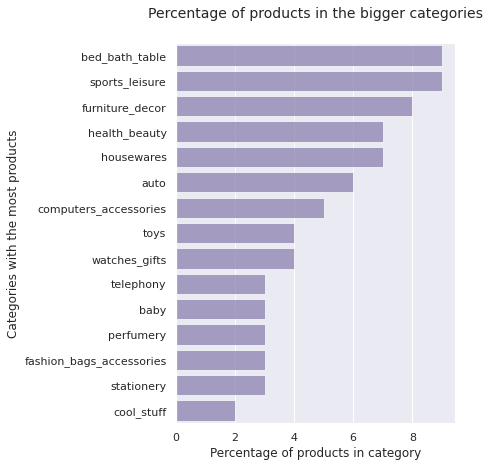

In [17]:
# Plotting bar chart
fig = plt.figure(figsize = (5,7))
sns.barplot(data =  df_plot,
            x = 'perc',
            y = 'product_category_name_english',
            color=sns.color_palette()[4], 
            alpha = 0.7)
plt.title('Percentage of products in the bigger categories', fontsize=14, y = 1.05)
plt.xlabel('Percentage of products in category')
plt.ylabel('Categories with the most products')
plt.show()

### Order-items

In this table we can study, for example, the number of items per order. The table contains the information of each item (with id 1,2,...), for each order.

We group the table by order and keep the maximum order_item_id, since it tells us how many items are in that order.

As we can see in the pie chart below, a great percentage of orders consist of only 1 item.

In [18]:
df = data['order-items']

In [19]:
print('The different possibilities for number of items per order are:')
df['order_item_id'].value_counts().index.tolist()

The different possibilities for number of items per order are:


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [20]:
# Defining our working dataframe
df = data['order-items']
## Selection of max = number of items in a unique order
df = df[['order_id', 'order_item_id']].groupby('order_id').max()

# Defining the dataframe for plotting
## creating categories for number of items per order
item_quant_cat = ['1', '2', '3', '> 3']
value_counts_series = df['order_item_id'].value_counts()
index_list = df['order_item_id'].value_counts().index.tolist()
item_quant = []
high_range = 0

for i in index_list:
    numb_orders = value_counts_series[i]
    if i in [1,2,3]:
        item_quant.append(numb_orders)
    elif i > 3:
        high_range += numb_orders

item_quant.append(high_range)

df_count = pd.DataFrame({'number_items' : item_quant_cat, 
            'number_orders' : item_quant
} )

df_count


,number_items,number_orders
0,1,88863
1,2,7516
2,3,1322
3,> 3,965


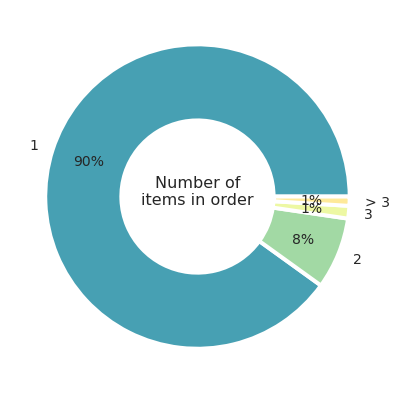

In [21]:
# plotting pie chart
fig = plt.figure(figsize=(7,7))

plt.pie(df_count['number_orders'], 
        labels = df_count['number_items'], 
        colors=sns.color_palette('Spectral')[::-1],
        wedgeprops = {'width': 0.5, 'linewidth': 4},
        autopct='%.0f%%',
        pctdistance=0.75,
        textprops={'size':14},
        labeldistance=1.1,
        # explode = (0.05,0.05,0.
        # 05,0.05,0.05, 0.05)
        )
fontdict = {'size' : 16,
           'horizontalalignment' : 'center'}
plt.text(0,-0.05,'Number of\nitems in order', fontdict = fontdict)


plt.show()

### Order payments

In this dataframe, an interesting property to study is the type of payment and the distribution of prices of orders.

We sampled orders with a payment value under 4000 R$ (BRL = Brazilian reals) We can see in the plot that most orders (over 60 %) are under 300 R$. We can also see that nearly 20 % of orders are payed by cash.

In [22]:
df = data['order-payments']
df.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

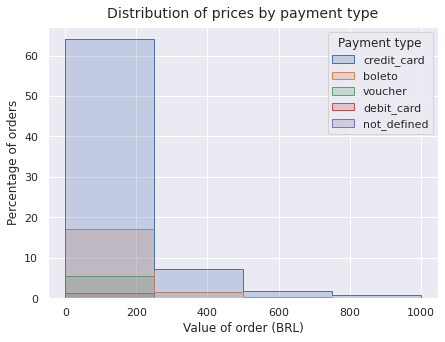

In [23]:
fig = plt.figure(figsize=(7,5))

hist = sns.histplot(df, 
             x = df.payment_value[df.payment_value<1000], 
             stat = 'percent',
            #  bins = 'sqrt',
             binwidth=250,
             hue = 'payment_type', 
             element = 'step')
sns.set_style("whitegrid")
plt.title('Distribution of prices by payment type', fontsize=14, y = 1.01)
plt.xlabel('Value of order (BRL)')
plt.ylabel('Percentage of orders') 

leg_title = 'Payment type'
hist.legend_.set_title(leg_title)

plt.show()

# reduire range x

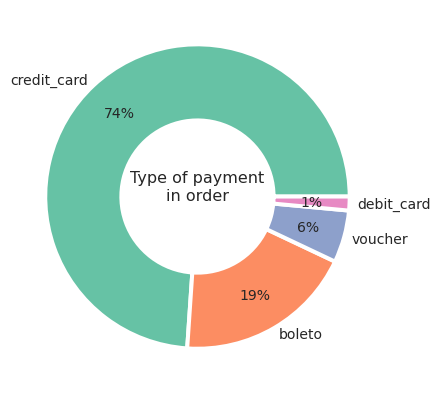

In [24]:
df_count = df.payment_type.value_counts().iloc[:-1]
df_count = pd.DataFrame({'payment_type' : df_count.index,
                         'count' : df_count.values })

# plotting pie chart
fig = plt.figure(figsize=(7,7))

plt.pie(df_count['count'], 
        labels = df_count['payment_type'], 
        colors=sns.color_palette('Set2'),
        wedgeprops = {'width': 0.5, 'linewidth': 4},
        autopct='%.0f%%',
        pctdistance=0.75,
        textprops={'size':14},
        labeldistance=1.05,
        # explode = (0.05,0.05,0.
        # 05,0.05,0.05, 0.05)
        )
fontdict = {'size' : 16,
           'horizontalalignment' : 'center'}
plt.text(0,-0.02,'Type of payment\nin order', fontdict = fontdict)

plt.show()

### Order

For this dataframe, we focus on measures of time of **order purchase** :

- Year
- Month
- Day of the year/week/month

We comment each plot with details and conclusions about data.

In [25]:
df = data['orders']
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [26]:
# Creating dataframe with time information for plotting
## start with two columns
purchase_timestamp = df.order_purchase_timestamp
purchase_timestamp = pd.to_datetime(purchase_timestamp)

## the rest of the columns
dayname = purchase_timestamp.dt.day_name()
dayofyear = purchase_timestamp.dt.day_of_year
day = purchase_timestamp.dt.day
month = purchase_timestamp.dt.month_name()
year = purchase_timestamp.dt.year

purchase_datetimes = pd.DataFrame({'timestamp' : purchase_timestamp,
                                   'day_name' : dayname,
                                   'day_of_year' : dayofyear,
                                   'day' : day,
                                   'month' : month,
                                   'year' : year})
purchase_datetimes.sort_values('timestamp', inplace=True)


In [27]:
# Creating dictionnary of dfs for visualizing data with
# respect to time/month/day of the year
# here each df will be also grouped by year
count_dic = {}

# dataframe grouping by year
count = purchase_datetimes.groupby('year').size().reset_index(name='counts')
count_dic['year'] = count

# rest of dataframes: grouping by day of the week, day of the year, month, etc.
for label in purchase_datetimes.columns[1:-1]:
    count = purchase_datetimes.groupby([label, 'year']).size().reset_index(name='counts')
    name = str(label)
    count_dic[name] = count

In [28]:
# Displaying a preview of each df in the dictionary 
for key in count_dic:
    print(f'count of **{key}**')
    display(count_dic[key].head(5))

count of **year**


,year,counts
0,2016,329
1,2017,45101
2,2018,54011


count of **day_name**


,day_name,year,counts
0,Friday,2016,47
1,Friday,2017,6915
2,Friday,2018,7160
3,Monday,2016,48
4,Monday,2017,7188


count of **day_of_year**


,day_of_year,year,counts
0,1,2018,74
1,2,2018,204
2,3,2018,225
3,4,2018,258
4,5,2017,32


count of **day**


,day,year,counts
0,1,2017,1398
1,1,2018,1703
2,2,2016,1
3,2,2017,1313
4,2,2018,1899


count of **month**


,month,year,counts
0,April,2017,2404
1,April,2018,6939
2,August,2017,4331
3,August,2018,6512
4,December,2016,1


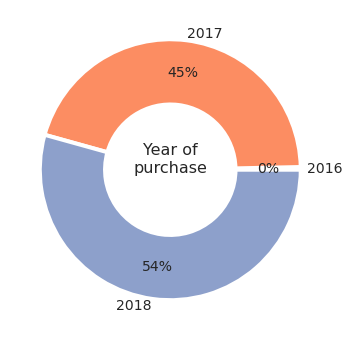

In [29]:
# Plotting pie chart
fig = plt.figure(figsize=(6,6))

df_count = count_dic['year']
plt.pie(df_count['counts'], 
        labels = df_count['year'], 
        colors=sns.color_palette('Set2'),
        wedgeprops = {'width': 0.5, 'linewidth': 4},
        autopct='%.0f%%',
        pctdistance=0.75,
        textprops={'size':14},
        labeldistance=1.05,
        # explode = (0.05,0.05,0.
        # 05,0.05,0.05, 0.05)
        )
fontdict = {'size' : 16,
           'horizontalalignment' : 'center'}
plt.text(0,-0.02,'Year of\npurchase', fontdict = fontdict)
plt.show()

> 📊 Most of our data consists of orders made in 2017 (45 %) and 2018 (54 %).

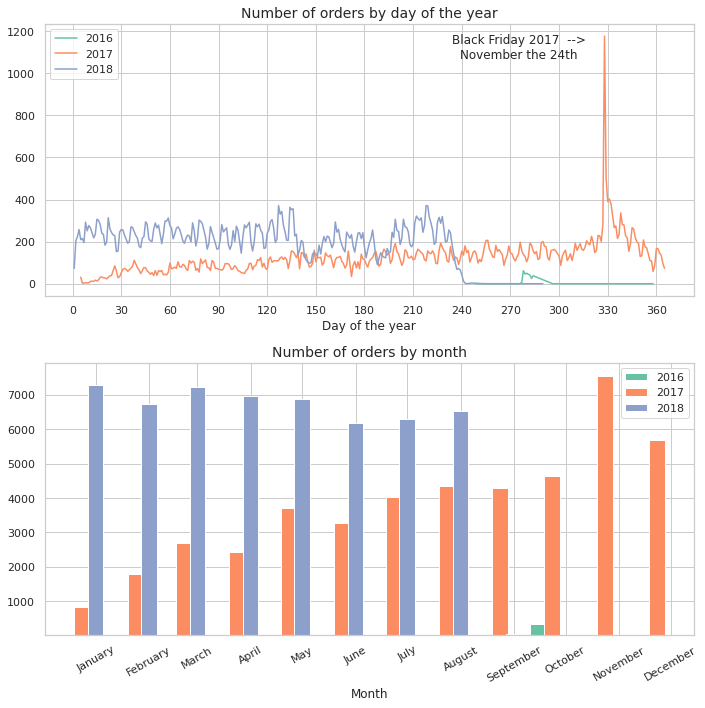

In [30]:
# plot
fig = plt.figure(figsize=(10,10))
colors = sns.color_palette('Set2')

# axis for day of the year
ax = fig.add_subplot(2,1,1)
df_month = count_dic['month']
df_day = count_dic['day_of_year'].sort_values('day_of_year')
## plot for each year
df = df_day.loc[df_day.year == 2016]
plt.plot(df['day_of_year'], df['counts'], label=2016, color=colors[0])
df = df_day.loc[df_day.year == 2017]
plt.plot(df['day_of_year'], df['counts'], label=2017, color=colors[1])
df = df_day.loc[df_day.year == 2018]
plt.plot(df['day_of_year'], df['counts'], label=2018, color=colors[2])
## other parameters
plt.xticks(range(0,365,30))
plt.title('Number of orders by day of the year', fontsize=14)
plt.xlabel('Day of the year')
plt.legend(loc='upper left')
## text for black friday peak
fontdict = {'size' : 12,
           'horizontalalignment' : 'center'}
plt.text(275,1070,'Black Friday 2017  -->\nNovember the 24th', fontdict = fontdict)

# axis for month
ax = fig.add_subplot(2,1,2)
## definition of order of months 
month_order =[
    'January',  'February', 'March',
    'April', 'May', 'June', 'July',
    'August', 'September', 'October',
    'November','December'
]
## center of the beans (half day of month)
x = [15,46,74,105,135,166,196,227,258,288,319,349]

## barplot for each year
df = df_month.loc[df_month['year'] == 2016]
df = df.set_index('month').reindex(month_order, axis=0)
plt.bar([i-8 for i in x],
        height = df['counts'],
        width = 9,
        align='center',
        tick_label = df.index,
        label= 2016,
        color=colors[0],
        bottom=20
        )
df = df_month.loc[df_month['year'] == 2017]
df = df.set_index('month').reindex(month_order, axis=0)
plt.bar(x,
        height = df['counts'],
        width = 9,
        align='center',
        tick_label = df.index,
        label= 2017,
        color=colors[1],
        bottom=20
        )
df = df_month.loc[df_month['year'] == 2018]
df = df.set_index('month').reindex(month_order, axis=0)
plt.bar([i+8 for i in x],
        height = df['counts'],
        width = 9,
        align='center',
        tick_label = df.index,
        label = 2018,
        color=colors[2],
        bottom=20
        )
plt.legend()
## other parameters
plt.title('Number of orders by month', fontsize=14)
plt.xlabel('Month')
plt.xticks(rotation=30)

# display figure
plt.tight_layout()
plt.show()

> 📊 These are interesting plots : first we observe that there are almost no orders from 2016. Probably they did not seriously gather data in that year. We have data from all year round in 2017, and finally the data from 2018 stops in august. This probably means that this data was gathered by the end of august 2018.
Another interesting fact shows that there is a peak day for the number of orders. Looking at this peak, we realized that its the 24th of November 2017. On this day there was "Black friday" an international day of discounts.

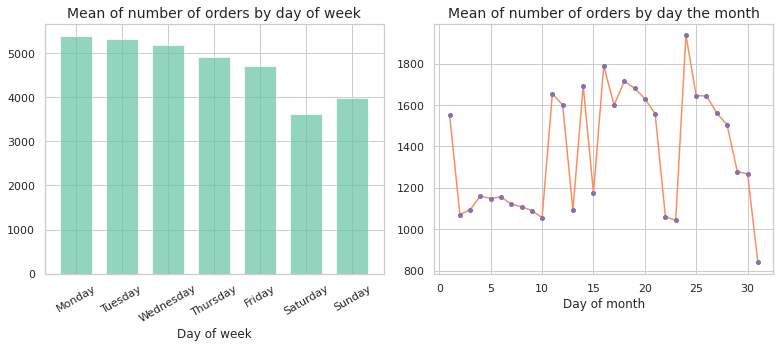

In [31]:
# plot
fig = plt.figure(figsize=(11,5))
colors = sns.color_palette('Set2')
colors2 = sns.color_palette()

# axis for day of month
ax = fig.add_subplot(1,2,2)
df = count_dic['day'].groupby('day').mean()
## plot for each year
plt.plot(df.index, 
         df['counts'], 
         color=colors[1], 
         marker='o',
         mfc=colors2[4],
         mec=colors2[4], 
         markersize=4)
## other parameters
# plt.xticks(range(0,365,30))
plt.title('Mean of number of orders by day the month', fontsize=14)
plt.xlabel('Day of month')


# axis for day of week 
ax = fig.add_subplot(1,2,1)
## definition of order of months 
day_order =[
    'Monday', 'Tuesday', 'Wednesday',
    'Thursday', 'Friday', 'Saturday',
    'Sunday'
]
## barplot for each day
df = count_dic['day_name'].groupby('day_name').mean().round(0)
df = df.reindex(day_order, axis=0)
plt.bar(range(1,8),
        height = df['counts'],
        width = 0.7,
        align='center',
        tick_label = df.index,
        color=colors[0],
        alpha=0.7
        )
## other parameters
plt.title('Mean of number of orders by day of week', fontsize=14)
plt.xlabel('Day of week')
plt.xticks(rotation=30)

# display figure
plt.tight_layout()
plt.show()

> 📊 We can see that the days with less number of orders are saturday and sunday. This is expected, since on these days, people generally don't work, or are out, away from they computers. We recall that this data is for online purchases.

> 📈 About the mean of orders by day of the month, we can see that it is relatively low from the second to the 10th day. It is quite high in the first day. We can see that after the 15th day the orders are quite high, this is probably due to the fact that a good number of people is paid bimonthly in Brazil: at the beginning/end of the month and in the middle.



# Merge, join, aggregation

For merging the 9 different dataframes we do the following : 

**Start** with (a copy of) the dataframe data['orders'] which has `order_id` as a key. We **merge** to it, **one by one**, the rest of dataframes. Keeping in mind that our goal is to have `customer_unique_id` as a **key**;  sometimes we will have to make a **choice** for which information to keep for each unique order.

The detailed steps are : 

1. Start with the dataframe `data['orders']`.

2. Merge with `data['customers']`

3. Merge with `data['order-reviews']`.

    In this merge we have chosen to keep only the column `review-score` since, it is the only one that we will use for our clustering.

4. Merge with `data['order-items']`

    The information that we would like to keep from this dataframe is the following:

    * Number of items bought per unique order (that is the max of the column `order_item_id` when grouping by `order_id`).
    * The `product_id`, `seller_id` and `price` for the most expensive product in a unique order.

5. Merge with `data['order-payments']`

    We will keep only a subset of the columns of the payments table. Also, there are payments done in sequence (`payment-sequential`). We keep the total payment_value, and the `payment_type` corresponding to the more expensive sequence. 

6. Merge with `data['products']` and translation from portuguese.

7. Merge with `data['sellers']`.

8. Merge with `data['geolocation']`.

9. Turning columns into pandas.datetime.

10. Aggregation: group by unique customer

### 1. Start with `data['orders']`

In [32]:
df = data['orders'].copy()

# Shape verification up to this point
print(f"Shape of dataframe : {df.shape}")

Shape of dataframe : (99441, 8)


In [33]:
# Preview of merged df
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


### 2. Merge with `data['customers']`

In [34]:
# Preview before merge
data['customers'].head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [35]:
# Merge on customer_id
df = df.merge(data['customers'], how='left', on='customer_id')

# Preview of merged dataframe
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [36]:
# Shape verification up to this point
print(f"Shape of dataframe : {df.shape}")

Shape of dataframe : (99441, 12)


In [37]:
# Check to see if duplicated where added
df['order_id'].duplicated(keep='first').sum()

0

### 3. Merge with `data['order-reviews']`

In this merge we have chosen to keep only the column `review-score` since, it is the only one that we will use for our clustering.

In [38]:
# Preview of order-reviews before merge
data['order-reviews'].head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [39]:
# Check if there are duplicated observation for a unique order
data['order-reviews']['order_id'].duplicated(keep='first').sum()

551

In [40]:
# Since duplicated, keep only the mean of review score per order
data_reviews_means = data['order-reviews'][['order_id','review_score']].groupby('order_id').mean()

# Merge with order-review
df = df.merge(data_reviews_means, how='left', on='order_id')
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,5.0


In [41]:
# Shape verification up to this point
print(f"Shape of dataframe : {df.shape}")

Shape of dataframe : (99441, 13)


In [42]:
# Check if duplicated where added during merge
df['order_id'].duplicated(keep='first').sum()

0

### 4. Merge with `data['order-items']`

The information that we would like to keep from this dataframe is the following:

* Number of items bought per unique order (that is the max of the column `order_item_id` when grouping by `order_id`).
* The `product_id`, `seller_id` and `price` for the most expensive product in a unique order.

In [43]:
# Preview of order-items
data['order-items'].head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [44]:
# This dataframe counts the number of items per order 
# (with max of order item id), and keeps the price of the 
# most expensive item.
items_per_order = data['order-items'][['order_id', 'order_item_id']].copy()
items_per_order = items_per_order.groupby('order_id').max().reset_index()
items_per_order.rename(columns={'order_item_id' : 'item_quantity'}, inplace=True)
items_per_order.head(3)

,order_id,item_quantity
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1


In [45]:
# The indexes of observations corresponding to the
# most expensive item in an order
index_max_price = data['order-items'].groupby('order_id')['price'].idxmax()

# The items that we keep for our study
data_items = data['order-items'].loc[index_max_price]
data_items.drop(columns=['freight_value', 'shipping_limit_date'], inplace=True)

# Preview before merge
data_items.head(3)

,order_id,order_item_id,product_id,seller_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.0


In [46]:
data_items = data_items.merge(items_per_order, on='order_id', how='left')
data_items.head()

,order_id,order_item_id,product_id,seller_id,price,item_quantity
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,1


> ⚠️ **Warning:** This table (`data['order-items']`) does not contain the information about each **order** in our base table (`data['orders']`). Hence, for the merge, we decide to keep only those orders for which we have all information (inner join). This causes the deletion of `775` over observations over `99441`, which is not very significant.

In [47]:
print(f"Number of orders with info in order-items: {data_items.shape[0]}")
# which is equal to
# data['order-items']['order_id'].nunique()
print(f"Number of orders: {df.shape[0]}")
print(f'Their difference: {df.shape[0] - data_items.shape[0]}')

Number of orders with info in order-items: 98666
Number of orders: 99441
Their difference: 775


In [48]:
# merge main dataframe with data_items
df = pd.merge(left=df, right=data_items, on ='order_id', how='inner')

# preview
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score,order_item_id,product_id,seller_id,price,item_quantity
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,4.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,1
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,4.0,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,5.0,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,1


In [49]:
# Shape verification up to this point
print(f"Shape of dataframe : {df.shape}")

Shape of dataframe : (98666, 18)


### 5. Merge with `data['order-payments']`

We will keep only a subset of the columns of the payments table. Also, there are payments done in sequence (`payment-sequential`). We keep the total payment_value, and the `payment_type` corresponding to the more expensive sequence.

In [50]:
# Preview of order-payments
data['order-payments'].head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [51]:
# Columns to keep
cols = [
    'order_id', 'payment_type', 'payment_value',
    'payment_installments'
]

# Check if duplicated order_id
data['order-payments']['order_id'].duplicated(keep='first').sum()

4446

In [52]:
# Check all different values for sequential payment
data['order-payments']['payment_sequential'].unique()

array([ 1,  2,  4,  5,  3,  8,  6,  7, 10, 11, 17, 19, 27, 12,  9, 15, 13,
       14, 16, 25, 22, 26, 29, 28, 18, 21, 24, 23, 20])

In [53]:
# Simple dataframe with total payment value per order
payment_simple = data['order-payments'][['order_id', 'payment_value']].groupby('order_id').sum().reset_index()
payment_simple.head(3)

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87


In [54]:
# Check if duplicate orders
payment_simple.duplicated(keep='first').sum()

0

Now, back to the dataframe order-payments, we keep the indexes for the more expensive sequential payment per order, since we would like to keep the associated type of payment (credit card, cash, etc.)

In [55]:
# The indexes of observations corresponding to the
# most expensive sequential payment
index = data['order-payments'].groupby('order_id')['payment_value'].idxmax()
data_payments = data['order-payments'].loc[index]
data_payments.drop(columns=['payment_sequential', 'payment_value'], inplace=True)

# Preview before merge
data_payments.head(3)

,order_id,payment_type,payment_installments
85283,00010242fe8c5a6d1ba2dd792cb16214,credit_card,2
2499,00018f77f2f0320c557190d7a144bdd3,credit_card,3
12393,000229ec398224ef6ca0657da4fc703e,credit_card,5


In [56]:
# Check for possible duplicated order_id
data_payments['order_id'].duplicated(keep='first').sum()


0

In [57]:
data_payments = data_payments.merge(payment_simple, how='left', on='order_id')
data_payments.rename(columns={'payment_value' : 'payment_total'})
data_payments.head()

,order_id,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card,3,218.04


In [58]:
# Checking size for number of different orders
data_payments.shape

(99440, 4)

In [59]:
# It is different than our base dataframe df
df.shape

(98666, 18)

Then, we keep only orders which are both on order-payments and in our base dataframe: orders

In [60]:
# merge with order-payments
df = pd.merge(left=df, right=data_payments, on ='order_id', how='inner')

# preview
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,customer_state,review_score,order_item_id,product_id,seller_id,price,item_quantity,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,SP,4.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,1,voucher,1,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,BA,4.0,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,GO,5.0,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,1,credit_card,3,179.12


In [61]:
# Size check
df.shape

(98665, 21)

### 6. Merge with `data['products']` and translation from portuguese

In [62]:
data['products'].head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [63]:
data['translation-category'].head(2)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [64]:
# Columns to keep
cols = [
    'product_id', 'product_category_name',
    'product_description_lenght', 'product_length_cm',
    'product_height_cm', 'product_width_cm'
]

# Merge to do translation name of category to english
data_products = data['products'][cols].merge(
    data['translation-category'],
    on = 'product_category_name',
    how = 'left'
)
data_products.drop(columns='product_category_name', inplace = True)

# Creating a new variable: product volume
# calculated from height, width and length
data_products['product_vol_cm3'] = (data_products.product_height_cm *
                                data_products.product_length_cm *
                                data_products.product_width_cm
                                )
# Drop heigh, length and width data, no longer useful
data_products.drop(
    columns=['product_height_cm',
             'product_length_cm',
             'product_width_cm'
             ],
    inplace=True)

data_products.head(3)

,product_id,product_description_lenght,product_category_name_english,product_vol_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,287.0,perfumery,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,276.0,art,10800.0
2,96bd76ec8810374ed1b65e291975717f,250.0,sports_leisure,2430.0


In [65]:
# Merge with products
df = df.merge(data_products, on ='product_id', how='left')
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_id,seller_id,price,item_quantity,payment_type,payment_installments,payment_value,product_description_lenght,product_category_name_english,product_vol_cm3
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,1,voucher,1,38.71,268.0,housewares,1976.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,1,boleto,1,141.46,178.0,perfumery,4693.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,1,credit_card,3,179.12,232.0,auto,9576.0


In [66]:
# Checking size
df.shape

(98665, 24)

### 7. Merge with `data['sellers']`

In [67]:
data['sellers'].head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [68]:
# Merge with sellers
df = df.merge(data['sellers'], on = 'seller_id', how='left')
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,item_quantity,payment_type,payment_installments,payment_value,product_description_lenght,product_category_name_english,product_vol_cm3,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,voucher,1,38.71,268.0,housewares,1976.0,9350,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1,boleto,1,141.46,178.0,perfumery,4693.0,31570,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1,credit_card,3,179.12,232.0,auto,9576.0,14840,guariba,SP


In [69]:
# Checking size 
df.shape

(98665, 27)

### 8. Merge with `data['geolocation']`

In [70]:
# Preview of geolocation dataframe
data['geolocation'].head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


This dataframe has a large number of rows:

In [71]:
data['geolocation'].shape

(1000163, 5)

In fact, for a unique geolocation zip code prefix, there are several latitude/longitude values. See an example below:

In [72]:
data['geolocation'].loc[data['geolocation']['geolocation_zip_code_prefix'] == 1037].head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
14,1037,-23.545187,-46.637855,são paulo,SP
31,1037,-23.546705,-46.640336,são paulo,SP
169,1037,-23.543883,-46.638075,são paulo,SP
178,1037,-23.546157,-46.639885,sao paulo,SP
236,1037,-23.543883,-46.638075,sao paulo,SP
283,1037,-23.545199,-46.637916,sao paulo,SP
417,1037,-23.545187,-46.637855,sao paulo,SP
420,1037,-23.546723,-46.640281,sao paulo,SP
433,1037,-23.546463,-46.640145,sao paulo,SP


For our merging goal, we group by zip code and keep the mean of latitude and mean of longitude.

In [73]:
# Columns to keep
cols = [
    'geolocation_zip_code_prefix', 
    'geolocation_lat', 'geolocation_lng'
]

# Group by zip code
lat_long_data = data['geolocation'][cols].groupby(
    'geolocation_zip_code_prefix').mean().reset_index()
lat_long_data.rename(
    columns = {'geolocation_lat' : 'latit',
               'geolocation_lng' : 'long'}, 
    inplace=True
)

# Preview
lat_long_data.head(3)

,geolocation_zip_code_prefix,latit,long
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731


In [74]:
# Merge latitude and longitude for seller
df = df.merge(
    lat_long_data,
    left_on = 'seller_zip_code_prefix',
    right_on = 'geolocation_zip_code_prefix',
    how='left'
)

# Renaming latitude and longitude for seller
df.rename(
    columns = {'latit' : 'latit_seller',
               'long' : 'long_seller'},
    inplace = True
)

# Merge latitude and longitude for customer
df = df.merge(
    lat_long_data,
    left_on = 'customer_zip_code_prefix',
    right_on = 'geolocation_zip_code_prefix',
    how='left'
)

# Renaming latitude and longitude for customer
df.rename(
    columns = {'latit' : 'latit_customer',
               'long' : 'long_customer'},
    inplace = True
)

print(f'Size of dataframe : {df.shape}')
display(df.head(3))

Size of dataframe : (98665, 33)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_vol_cm3,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix_x,latit_seller,long_seller,geolocation_zip_code_prefix_y,latit_customer,long_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1976.0,9350,maua,SP,9350.0,-23.680729,-46.444238,3149.0,-23.576983,-46.587161
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,4693.0,31570,belo horizonte,SP,31570.0,-19.807681,-43.980427,47813.0,-12.177924,-44.660711
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,9576.0,14840,guariba,SP,14840.0,-21.363502,-48.229601,75265.0,-16.745150,-48.514783


In [75]:
# Deleting columns that we will not use anymore

df.drop(
    columns=[ 
        'customer_zip_code_prefix',
        'seller_zip_code_prefix',
        'geolocation_zip_code_prefix_x',
        'geolocation_zip_code_prefix_y'
    ],
    inplace = True
)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98665 entries, 0 to 98664
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       98665 non-null  object 
 1   customer_id                    98665 non-null  object 
 2   order_status                   98665 non-null  object 
 3   order_purchase_timestamp       98665 non-null  object 
 4   order_approved_at              98651 non-null  object 
 5   order_delivered_carrier_date   97656 non-null  object 
 6   order_delivered_customer_date  96475 non-null  object 
 7   order_estimated_delivery_date  98665 non-null  object 
 8   customer_unique_id             98665 non-null  object 
 9   customer_city                  98665 non-null  object 
 10  customer_state                 98665 non-null  object 
 11  review_score                   97916 non-null  float64
 12  order_item_id                  98665 non-null 

In [77]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_city', 'customer_state', 'review_score',
       'order_item_id', 'product_id', 'seller_id', 'price', 'item_quantity',
       'payment_type', 'payment_installments', 'payment_value',
       'product_description_lenght', 'product_category_name_english',
       'product_vol_cm3', 'seller_city', 'seller_state', 'latit_seller',
       'long_seller', 'latit_customer', 'long_customer'],
      dtype='object')

### Turning columns into pandas.datetime

For this, let us first check the type of each column:

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98665 entries, 0 to 98664
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       98665 non-null  object 
 1   customer_id                    98665 non-null  object 
 2   order_status                   98665 non-null  object 
 3   order_purchase_timestamp       98665 non-null  object 
 4   order_approved_at              98651 non-null  object 
 5   order_delivered_carrier_date   97656 non-null  object 
 6   order_delivered_customer_date  96475 non-null  object 
 7   order_estimated_delivery_date  98665 non-null  object 
 8   customer_unique_id             98665 non-null  object 
 9   customer_city                  98665 non-null  object 
 10  customer_state                 98665 non-null  object 
 11  review_score                   97916 non-null  float64
 12  order_item_id                  98665 non-null 

In [79]:
# Timestamp columns
cols = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

# Turning string date into pandas timestamp
for col in cols:
    df[col] = pd.to_datetime(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98665 entries, 0 to 98664
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98665 non-null  object        
 1   customer_id                    98665 non-null  object        
 2   order_status                   98665 non-null  object        
 3   order_purchase_timestamp       98665 non-null  datetime64[ns]
 4   order_approved_at              98651 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97656 non-null  datetime64[ns]
 6   order_delivered_customer_date  96475 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98665 non-null  datetime64[ns]
 8   customer_unique_id             98665 non-null  object        
 9   customer_city                  98665 non-null  object        
 10  customer_state                 98665 non-null  object        
 11  review_score   

## Aggregation (group by)

We now have a dataframe `df` with all merged info about every order, here the key is `order_id`.

Recall that we want a dataframe with unique id: `unique_customer_id`. For this we create the dataframe `customer_df` by grouping `df` by `unique_customer_id` and getting first some basic info such as:

* **Recency** of the last order,
* **Frequency** of orders, by counting the number of orders in `df`, and
* **Monetary**: the mean of the payment value for all orders of a unique customer.

In [80]:
# Most recent purchase date of any of the orders
most_recent = df['order_purchase_timestamp'].max()

# Defining new variable recency
df['recency'] = most_recent - df['order_purchase_timestamp']
# conversion of recency to number of days (this is the one that we'll use)
df['recency_days'] = df['recency'].apply(lambda delta : delta.days)

# Defining new variable: difference between purchase time
# and delivered time
df['days_bet_purch_deliver']= df.order_delivered_carrier_date - df.order_purchase_timestamp
# conversion of difference to number of days (this is the one that we'll use)
df['days_bet_purch_deliver'] = df['days_bet_purch_deliver'].apply(lambda delta : delta.days)

# Preview
print(f'Size of the dataframe df: {df.shape}')
display(df.head(3))

Size of the dataframe df: (98665, 32)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,...,product_vol_cm3,seller_city,seller_state,latit_seller,long_seller,latit_customer,long_customer,recency,recency_days,days_bet_purch_deliver
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,1976.0,maua,SP,-23.680729,-46.444238,-23.576983,-46.587161,335 days 22:10:24,335,2.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,...,4693.0,belo horizonte,SP,-19.807681,-43.980427,-12.177924,-44.660711,40 days 12:25:20,40,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,...,9576.0,guariba,SP,-21.363502,-48.229601,-16.745150,-48.514783,26 days 00:28:08,26,0.0


### Group by unique customer

There are two steps for this last merging stage :

1. **Aggregate** columns in group by unique customer, which need to be aggregated. Where we decide to aggregate some by mean (average), max or min, depending on the interest of the variable.

2. **Join**/merge the aggregated dataframe in step 1, with information (dates, items, seller) about one chosen specific order_id from `df` (we choose the most expensive order by unique customer).

#### Step 1: Aggregate

In [81]:
df_customer = (
    df.groupby('customer_unique_id', as_index=False)
      .agg({
        'order_id' : 'size',
        'review_score' : 'mean',
        'price' : 'mean',
        'item_quantity' : 'mean',
        'payment_installments' : 'mean',
        'payment_value' : 'mean',
        'recency_days' : 'min'
      })
      .rename(columns={
        'order_id' : 'frequency',
        'review_score' : 'review_score_avg',
        'price' : 'price_item_avg',
        'item_quantity' : 'item_quant_avg',
        'payment_installments' : 'payment_install_avg',
        'payment_value' : 'payment_value_avg',
        'recency_days' : 'recency_days'
      })
)

print(f'There are {df_customer.shape[0]} unique customers.')
display(df_customer.head(3))

There are 95419 unique customers.


,customer_unique_id,frequency,review_score_avg,price_item_avg,item_quant_avg,payment_install_avg,payment_value_avg,recency_days
0,0000366f3b9a7992bf8c76cfdf3221e2,1,5.0,129.9,1.0,8.0,141.90,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,4.0,18.9,1.0,1.0,27.19,118
2,0000f46a3911fa3c0805444483337064,1,3.0,69.0,1.0,8.0,86.22,541


In [82]:
# Check that there are no duplicated
df_customer.duplicated('customer_unique_id', keep='first').sum()

0

#### Step 2: join

Let us first choose the indexes corresponding to the most expensive order by each unique client:

In [83]:
df.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,...,product_vol_cm3,seller_city,seller_state,latit_seller,long_seller,latit_customer,long_customer,recency,recency_days,days_bet_purch_deliver
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,...,1976.0,maua,SP,-23.680729,-46.444238,-23.576983,-46.587161,335 days 22:10:24,335,2.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,...,4693.0,belo horizonte,SP,-19.807681,-43.980427,-12.177924,-44.660711,40 days 12:25:20,40,1.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,...,9576.0,guariba,SP,-21.363502,-48.229601,-16.745150,-48.514783,26 days 00:28:08,26,0.0


In [84]:
# The indexes of orders corresponding to the
# most expensive item in an order
indexs = df.groupby('customer_unique_id')['payment_value'].idxmax()
# Keep only this observations
df = df.loc[indexs]

# Preview
print(f'Shape of dataframe: {df.shape}')
display(df.head(3))

Shape of dataframe: (95419, 32)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,...,product_vol_cm3,seller_city,seller_state,latit_seller,long_seller,latit_customer,long_customer,recency,recency_days,days_bet_purch_deliver
52388,e22acc9c116caa3f2b7121bbb380d08e,fadbb3709178fc513abc1b2670aa1ad2,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21,0000366f3b9a7992bf8c76cfdf3221e2,cajamar,...,7616.0,piracicaba,SP,-22.708702,-47.664701,-23.340235,-46.830140,115 days 22:10:30,115,1.0
73316,3594e05a005ac4d06a72673270ef9ec9,4cb282e167ae9234755102258dd52ee8,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,2018-05-10 18:02:42,2018-05-15,0000b849f77a49e4a4ce2b2a4ca5be3f,osasco,...,5148.0,sao paulo,SP,-23.490759,-46.583369,-23.559115,-46.787626,118 days 21:55:30,118,2.0
26249,b33ec3b699337181488304f362a6b734,9b3932a6253894a02c1df9d19004239f,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,2017-04-05 14:38:47,2017-04-07,0000f46a3911fa3c0805444483337064,sao jose,...,43750.0,campo limpo paulista,SP,-23.211746,-46.762875,-27.542880,-48.633426,541 days 12:01:54,541,2.0


We are ready to make the last join of our two tables: 

* `df` containing info per order and,

* `df_customer` containing the aggregated data for each unique customer.

In [85]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_city', 'customer_state', 'review_score',
       'order_item_id', 'product_id', 'seller_id', 'price', 'item_quantity',
       'payment_type', 'payment_installments', 'payment_value',
       'product_description_lenght', 'product_category_name_english',
       'product_vol_cm3', 'seller_city', 'seller_state', 'latit_seller',
       'long_seller', 'latit_customer', 'long_customer', 'recency',
       'recency_days', 'days_bet_purch_deliver'],
      dtype='object')

In [86]:
df_customer.columns

Index(['customer_unique_id', 'frequency', 'review_score_avg', 'price_item_avg',
       'item_quant_avg', 'payment_install_avg', 'payment_value_avg',
       'recency_days'],
      dtype='object')

In [87]:
# Columns from df that we keep for joining
cols = [
    'order_status', 'order_purchase_timestamp',
    'order_approved_at', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 
    'order_estimated_delivery_date',
    'customer_unique_id', 'customer_city', 'customer_state', 
    'seller_id', 'payment_type', 'product_category_name_english', 
    'product_vol_cm3', 'seller_city', 'seller_state', 
    'latit_seller', 'long_seller', 'latit_customer', 
    'long_customer', 'days_bet_purch_deliver'
]


# merge of the two dataframes
df_customer = df_customer.merge(
    df[cols],
    on = 'customer_unique_id',
    how = 'left'
)
df_customer.set_index('customer_unique_id', inplace=True)

# Preview
print(f'Size of dataframe: {df_customer.shape}')
display(df_customer.head(3))

Size of dataframe: (95419, 26)


,frequency,review_score_avg,price_item_avg,item_quant_avg,payment_install_avg,payment_value_avg,recency_days,order_status,order_purchase_timestamp,order_approved_at,...,payment_type,product_category_name_english,product_vol_cm3,seller_city,seller_state,latit_seller,long_seller,latit_customer,long_customer,days_bet_purch_deliver
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,5.0,129.9,1.0,8.0,141.90,115,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,...,credit_card,bed_bath_table,7616.0,piracicaba,SP,-22.708702,-47.664701,-23.340235,-46.830140,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,4.0,18.9,1.0,1.0,27.19,118,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,...,credit_card,health_beauty,5148.0,sao paulo,SP,-23.490759,-46.583369,-23.559115,-46.787626,2.0
0000f46a3911fa3c0805444483337064,1,3.0,69.0,1.0,8.0,86.22,541,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,...,credit_card,stationery,43750.0,campo limpo paulista,SP,-23.211746,-46.762875,-27.542880,-48.633426,2.0


# Obtained dataframe review

The following information gives: the size of the dataframe, the type of each column and how many columns per type there are.

In [88]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95419 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   frequency                      95419 non-null  int64         
 1   review_score_avg               94720 non-null  float64       
 2   price_item_avg                 95419 non-null  float64       
 3   item_quant_avg                 95419 non-null  float64       
 4   payment_install_avg            95419 non-null  float64       
 5   payment_value_avg              95419 non-null  float64       
 6   recency_days                   95419 non-null  int64         
 7   order_status                   95419 non-null  object        
 8   order_purchase_timestamp       95419 non-null  datetime64[ns]
 9   order_approved_at              95405 non-null  datetime64[ns]
 10  order_delivered_carrier_date 

# Cleaning

We start by observing at the distributions, to see if there is errors or outliers

In [89]:
# Preview of the distributions of data
df_customer.describe()

,frequency,review_score_avg,price_item_avg,item_quant_avg,payment_install_avg,payment_value_avg,recency_days,product_vol_cm3,latit_seller,long_seller,latit_customer,long_customer,days_bet_purch_deliver
count,95419.000000,94720.000000,95419.000000,95419.000000,95419.000000,95419.000000,95419.000000,95405.000000,95213.000000,95213.000000,95154.000000,95154.000000,94446.000000
mean,1.034018,4.102521,127.253424,1.139081,2.914012,161.073738,242.595406,15421.924522,-22.791661,-47.217566,-21.176670,-46.170803,2.738316
std,0.211235,1.326359,192.454250,0.526848,2.692599,221.208572,153.153422,23700.378591,2.760126,2.358829,5.625812,4.061030,3.624228
min,1.000000,1.000000,0.850000,1.000000,0.000000,9.590000,0.000000,168.000000,-32.079231,-67.813284,-33.689948,-72.668881,-172.000000
25%,1.000000,4.000000,43.000000,1.000000,1.000000,62.440000,118.000000,2850.000000,-23.612734,-48.687601,-23.589269,-48.108023,1.000000
50%,1.000000,5.000000,79.900000,1.000000,2.000000,105.780000,223.000000,6510.000000,-23.425556,-46.743468,-22.923671,-46.630628,2.000000
75%,1.000000,5.000000,139.940000,1.000000,4.000000,177.150000,352.000000,18750.000000,-21.757321,-46.518565,-20.110674,-43.591752,4.000000
max,16.000000,5.000000,6735.000000,21.000000,24.000000,13664.080000,728.000000,296208.000000,-2.501242,-34.855616,42.184003,-8.723762,125.000000


Let us have a better understanding of these values with boxplots for numerical values:

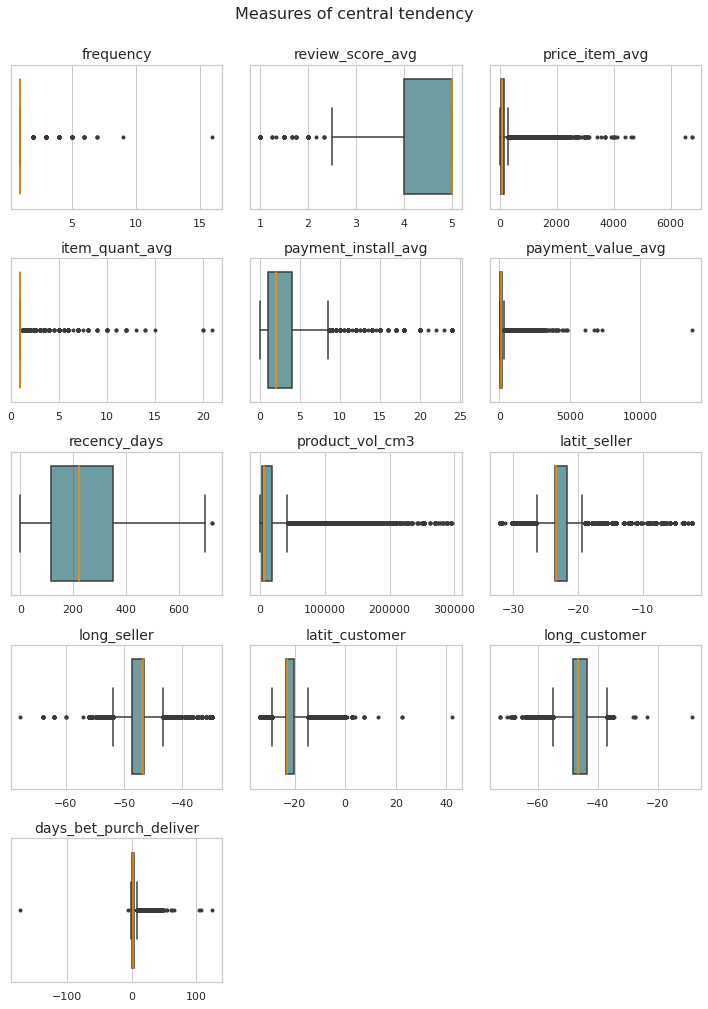

In [90]:
fig = plt.figure(figsize=(10,14))
for idx,feat in enumerate(df_customer.select_dtypes(include=[np.number]).columns):
    ax = fig.add_subplot(5,3,idx+1)
    sns.boxplot(
        x=df_customer[feat], 
        orient='h', 
        ax=ax,
        fliersize=3, 
        palette='crest',
        flierprops={'marker':'o'},
        medianprops = {'color':'darkorange'})
    for patch in ax.patches:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .75))
    ax.set_title(feat,fontsize=14)
    ax.set_xlabel(None)

fig.suptitle('Measures of central tendency', fontsize=16, y=1)
plt.tight_layout()
# fig.savefig('./img/eda_mesures_tend.png',bbox_inches='tight')
plt.show()

## Review of extreme values

Let us review some of the outliers to delete them if they are mistakes or are not representative, or keep them.

* frequency > 13

    There is one client with frequency > 13. We drop it, it does not follow the same distribution as the rest.

In [91]:
display(df_customer.loc[df_customer.frequency > 13])

idx_drop = df_customer.loc[df_customer.frequency > 13].index
df_customer.drop(index=idx_drop, inplace=True)

,frequency,review_score_avg,price_item_avg,item_quant_avg,payment_install_avg,payment_value_avg,recency_days,order_status,order_purchase_timestamp,order_approved_at,...,payment_type,product_category_name_english,product_vol_cm3,seller_city,seller_state,latit_seller,long_seller,latit_customer,long_customer,days_bet_purch_deliver
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
8d50f5eadf50201ccdcedfb9e2ac8455,16,5.0,45.60125,1.0,1.375,56.3775,13,delivered,2017-07-24 22:11:50,2017-07-24 22:25:14,...,credit_card,sports_leisure,6000.0,joinville,SC,-26.287307,-48.851802,-23.618666,-46.639583,1.0


* price_item_avg > 6000 (or df_customer.price > 6000, the same observations.)

    There are three observations with price_item_avg > 6000. The categories of their most expensive products are houseware, computers and art. This seems reasonable since those type of objects can be quite expensive compared to everyday items.

In [92]:
display(df_customer.loc[df_customer.price_item_avg > 6000])

idx_drop = df_customer.loc[df_customer.price_item_avg > 6000].index
df_customer.drop(index=idx_drop, inplace=True)

,frequency,review_score_avg,price_item_avg,item_quant_avg,payment_install_avg,payment_value_avg,recency_days,order_status,order_purchase_timestamp,order_approved_at,...,payment_type,product_category_name_english,product_vol_cm3,seller_city,seller_state,latit_seller,long_seller,latit_customer,long_customer,days_bet_purch_deliver
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
459bef486812aa25204be022145caa62,1,NaN,6729.0,1.0,1.0,6922.21,39,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,...,boleto,computers,45684.0,londrina,PR,-23.311279,-51.157084,-20.275790,-40.289206,8.0
dc4802a71eae9be1dd28f5d788ceb526,1,5.0,6735.0,1.0,8.0,6929.31,567,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,...,credit_card,housewares,120780.0,sao paulo,SP,-23.517310,-46.519781,-20.484610,-54.570572,3.0
ff4159b92c40ebe40454e3e6a7c35ed6,1,5.0,6499.0,1.0,1.0,6726.66,466,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,...,boleto,art,29375.0,goiania,GO,-16.695509,-49.277109,-22.203421,-49.959068,1.0


* item_quant_avg > 15

    Only one customer has such a high average for quantity of items purchased. We decide to drop this observation since it does not represent the distribution of the rest.

In [93]:
display(df_customer.loc[df_customer.item_quant_avg > 15])

idx_drop = df_customer.loc[df_customer.item_quant_avg > 15].index
df_customer.drop(index=idx_drop, inplace=True)

,frequency,review_score_avg,price_item_avg,item_quant_avg,payment_install_avg,payment_value_avg,recency_days,order_status,order_purchase_timestamp,order_approved_at,...,payment_type,product_category_name_english,product_vol_cm3,seller_city,seller_state,latit_seller,long_seller,latit_customer,long_customer,days_bet_purch_deliver
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
4546caea018ad8c692964e3382debd19,1,1.0,7.8,21.0,2.0,196.11,413,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,...,credit_card,health_beauty,1800.0,sao paulo,SP,-23.488234,-46.469989,-23.680743,-46.784224,3.0
698e1cf81d01a3d389d96145f7fa6df8,1,NaN,98.7,20.0,4.0,2262.80,375,delivered,2017-08-23 09:22:34,2017-08-24 14:30:23,...,credit_card,auto,18600.0,sao paulo,SP,-23.541812,-46.624550,-16.717011,-49.253662,2.0
c402f431464c72e27330a67f7b94d4fb,1,1.0,100.0,20.0,1.0,2202.40,192,delivered,2018-02-22 15:30:41,2018-02-24 03:20:27,...,boleto,computers_accessories,5130.0,sao jose dos campos,SP,-23.246681,-45.886909,-23.529825,-46.618174,7.0


* payment_value_avg > 10000

    Very few customers have such a high average for payment of orders. We decide to drop these observations since they don't represent the distribution of the rest.

In [94]:
display(df_customer.loc[df_customer.payment_value_avg > 10000])

idx_drop = df_customer.loc[df_customer.payment_value_avg > 10000].index
df_customer.drop(index=idx_drop, inplace=True)

,frequency,review_score_avg,price_item_avg,item_quant_avg,payment_install_avg,payment_value_avg,recency_days,order_status,order_purchase_timestamp,order_approved_at,...,payment_type,product_category_name_english,product_vol_cm3,seller_city,seller_state,latit_seller,long_seller,latit_customer,long_customer,days_bet_purch_deliver
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0a0a92112bd4c708ca5fde585afaa872,1,1.0,1680.0,8.0,1.0,13664.08,338,delivered,2017-09-29 15:24:52,2017-10-02 15:28:20,...,credit_card,fixed_telephony,4096.0,sao paulo,SP,-23.531307,-46.494795,-22.901209,-43.184957,11.0


* df_customer.recency_days > 700

    There are only two customers for whose last order was almost two years ago. They are not representative of the distribution of the rest. Then we decide to drop them.

In [95]:
display(df_customer.loc[df_customer.recency_days > 700])

idx_drop = df_customer.loc[df_customer.recency_days > 700].index
df_customer.drop(index=idx_drop, inplace=True)

,frequency,review_score_avg,price_item_avg,item_quant_avg,payment_install_avg,payment_value_avg,recency_days,order_status,order_purchase_timestamp,order_approved_at,...,payment_type,product_category_name_english,product_vol_cm3,seller_city,seller_state,latit_seller,long_seller,latit_customer,long_customer,days_bet_purch_deliver
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
4854e9b3feff728c13ee5fc7d1547e92,1,1.0,59.50,1.0,3.0,75.06,728,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,...,credit_card,telephony,1250.0,curitiba,PR,-25.490559,-49.302027,-28.264640,-52.425421,NaN
b7d76e111c89f7ebf14761390f0f7d17,1,1.0,39.99,2.0,1.0,136.23,728,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,...,credit_card,furniture_decor,5376.0,monte siao,MG,-22.430218,-46.573405,2.813746,-60.701007,43.0


* days_bet_purch_deliver: days between purchase and deliver of order

    There are 26 clients for whom this difference is negative. These are mistakes of information, since the date of deliver should always be more recent than the date of purchase. We drop these clients.

In [96]:
display(df_customer.loc[df_customer.days_bet_purch_deliver <0])

idx_drop = df_customer.loc[df_customer.days_bet_purch_deliver <0].index
df_customer.drop(index=idx_drop, inplace=True)

,frequency,review_score_avg,price_item_avg,item_quant_avg,payment_install_avg,payment_value_avg,recency_days,order_status,order_purchase_timestamp,order_approved_at,...,payment_type,product_category_name_english,product_vol_cm3,seller_city,seller_state,latit_seller,long_seller,latit_customer,long_customer,days_bet_purch_deliver
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
027dff2201a97b9920d2dd5240f51a02,1,5.0,160.0,1.0,1.0,179.22,17,delivered,2018-08-16 14:26:06,2018-08-16 15:24:46,...,boleto,watches_gifts,4224.0,navegantes,SC,-26.890666,-48.655328,-20.818959,-49.377346,-1.0
0408706c63edeca6b44b24f6f077aa47,1,5.0,85.0,1.0,8.0,100.47,123,delivered,2018-05-02 10:48:44,2018-05-02 11:13:45,...,credit_card,health_beauty,3146.0,sao paulo,SP,-23.513042,-46.651994,-25.472311,-49.538964,-1.0
04566771b8e5e584658f119956490385,1,1.0,50.0,1.0,2.0,59.28,81,delivered,2018-06-13 15:23:50,2018-06-13 15:38:18,...,credit_card,small_appliances,4500.0,rio de janeiro,RJ,-22.979900,-43.491765,-22.652696,-43.276126,-1.0
053e68c25ace8722da8c06b60e4fa769,1,3.0,44.0,1.0,1.0,67.03,81,delivered,2018-06-13 11:33:10,2018-06-13 11:55:13,...,boleto,watches_gifts,640.0,sao paulo,SP,-23.652366,-46.755753,-2.514355,-44.298135,-1.0
05da72f690ec2fc4d00529e6e5d9a677,1,4.0,75.0,1.0,1.0,87.97,93,delivered,2018-06-01 13:48:45,2018-06-01 14:11:51,...,credit_card,health_beauty,2772.0,franca,SP,-20.536614,-47.433584,-22.197207,-49.952195,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
faf869bf565016fb42f3386fc7882aea,1,5.0,69.0,1.0,2.0,83.79,25,delivered,2018-08-08 15:42:27,2018-08-08 15:55:11,...,credit_card,housewares,11339.0,presidente prudente,SP,-22.136229,-51.372450,-23.584059,-46.686376,-1.0
fc0334b0e1e56824d1886ffc4b7d2f36,1,4.0,109.0,1.0,6.0,133.84,18,delivered,2018-08-15 14:02:44,2018-08-15 14:24:18,...,credit_card,stationery,56980.0,campo limpo paulista,SP,-23.211746,-46.762875,-21.930548,-50.498348,-1.0
fd2c72747d288341705e63860fdda849,1,5.0,69.9,1.0,4.0,88.49,17,delivered,2018-08-16 15:46:02,2018-08-16 15:55:24,...,credit_card,auto,3200.0,sao paulo,SP,-23.609272,-46.618554,-31.102961,-50.913407,-1.0


## Missing values

In [97]:
df_customer.isna().sum()

frequency                           0
review_score_avg                  696
price_item_avg                      0
item_quant_avg                      0
payment_install_avg                 0
payment_value_avg                   0
recency_days                        0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date      972
order_delivered_customer_date    2108
order_estimated_delivery_date       0
customer_city                       0
customer_state                      0
seller_id                           0
payment_type                        0
product_category_name_english    1389
product_vol_cm3                    14
seller_city                         0
seller_state                        0
latit_seller                      206
long_seller                       206
latit_customer                    265
long_customer                     265
days_bet_purch_deliver            972
dtype: int64

Our strategy for filling missing values is the following:

| Variables  |  Strategy |
|---|---|
| 'review_score_avg','latit_seller', 'long_seller', 'latit_customer' 'long_customer', days_bet_purch_deliver    |    **median**, since it seams reasonable for these numerical values         |
|  product_vol_cm3 | **mean**| 
| 'order_approved_at', 'order_delivered_customer_date'  |  the most recent date of any order.     |
| 'product_category_name_english'  | the string `'no_cat'`                                                 



In [98]:
# Dictionnary for filling missing values
fill_dict = {
    'review_score_avg' : df_customer.review_score_avg.median(),
    'order_approved_at' : most_recent,
    'order_delivered_carrier_date' : most_recent,
    'order_delivered_customer_date' : most_recent,
    'product_category_name_english' : 'no_cat', 
    'latit_seller' : df_customer.latit_seller.median(),
    'long_seller' : df_customer.long_seller.median(),
    'latit_customer' : df_customer.latit_customer.median(),
    'long_customer' : df_customer.long_customer.median(),
    'product_vol_cm3': df_customer.product_vol_cm3.mean(),
    'days_bet_purch_deliver': df_customer.days_bet_purch_deliver.mean()
}

# Filling missing values
df_customer.fillna(
    fill_dict,
    inplace=True
)

In [99]:
# Check if still missing values
df_customer.isna().sum()

frequency                        0
review_score_avg                 0
price_item_avg                   0
item_quant_avg                   0
payment_install_avg              0
payment_value_avg                0
recency_days                     0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_city                    0
customer_state                   0
seller_id                        0
payment_type                     0
product_category_name_english    0
product_vol_cm3                  0
seller_city                      0
seller_state                     0
latit_seller                     0
long_seller                      0
latit_customer                   0
long_customer                    0
days_bet_purch_deliver           0
dtype: int64

# Correlations
 
We plot a heatmap to observe the possible correlations amongst numerical variables.

/home/ana/.local/lib/python3.10/site-packages/seaborn/matrix.py:306: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/home/ana/.local/lib/python3.10/site-packages/seaborn/matrix.py:316: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



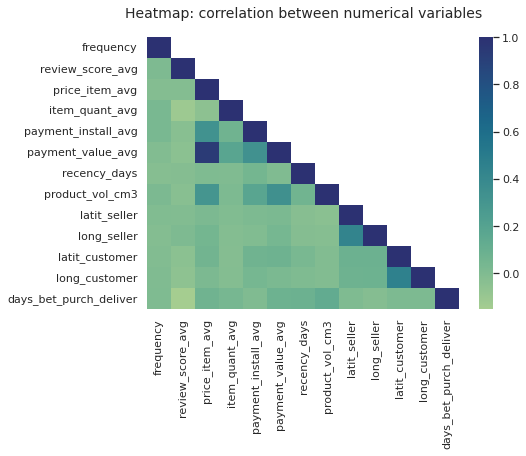

In [100]:
fig,ax = plt.subplots(figsize=(7,5))

corr = df_customer.select_dtypes(include=[np.number]).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Include diag values
mask[np.diag_indices_from(mask)] = False

sns.heatmap(corr, 
            mask=mask,
            cmap='crest', 
            ax=ax)
ax.set_title('Heatmap: correlation between numerical variables', 
             fontsize=14,
             y=1.05)
ax.grid(False)
# fig.savefig('./img/eda_corr_heatmap.png',bbox_inches='tight')
plt.show()

> 📉 We can see that there is a strong correlation between the price of the item in the chosen order (the most expensive of each unique customer) and the averages of the prices of the items bought by the customer. Also with the total payment and average total payment of each customer. This is no surprise.

# Creation of some variables

We create a category size_city_type for the size type of the city of the customer. It can be:

* big
* medium
* small
* village

The information for the first three categories is taken from the table in the [Wikipedia article List of cities in Brazil by population]('https://en.wikipedia.org/wiki/List_of_cities_in_Brazil_by_population'). The category 'village' is formed by the rest of the cities which are not mentioned in this list.

In [103]:
cities_table = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_cities_in_Brazil_by_population'
    )[0]


In [104]:
# Preview of table
cities_table.head()

,City,State,2021 Estimate,2010 Census,Change
0,São Paulo,São Paulo,12396372,11253503,+10.16%
1,Rio de Janeiro,Rio de Janeiro,6775561,6320446,+7.20%
2,Brasília,Distrito Federal,3094325,2570160,+20.39%
3,Salvador,Bahia,2900319,2675656,+8.40%
4,Fortaleza,Ceará,2703391,2452185,+10.24%


In [105]:
# New column normalizing the name of the city (without accents, etc.)
cities_table['city_normal_name'] = cities_table.City.map(unidecode)

# lower case the normal name
cities_table['city_normal_name'] = cities_table['city_normal_name'].map(lambda name: name.lower() )

In [106]:
# Preview of table
cities_table.head()

,City,State,2021 Estimate,2010 Census,Change,city_normal_name
0,São Paulo,São Paulo,12396372,11253503,+10.16%,sao paulo
1,Rio de Janeiro,Rio de Janeiro,6775561,6320446,+7.20%,rio de janeiro
2,Brasília,Distrito Federal,3094325,2570160,+20.39%,brasilia
3,Salvador,Bahia,2900319,2675656,+8.40%,salvador
4,Fortaleza,Ceará,2703391,2452185,+10.24%,fortaleza


In [107]:
# Defining the 3 categories of city size
cities_table.loc[cities_table['2021 Estimate'] > 500000,'city_size_type'] = 'big'
cities_table.loc[
    (cities_table['2021 Estimate'] <= 500000) &
    (cities_table['2021 Estimate'] >= 200000)
    ,'city_size_type'
    ] = 'medium'
cities_table.loc[cities_table['2021 Estimate'] < 200000,'city_size_type'] = 'small'

In [108]:
# The information for the table covers a limited number of cities:
cities_table.city_size_type.value_counts()

small     171
medium    106
big        49
Name: city_size_type, dtype: int64

In [109]:
# We have more than 4000 cities
df_customer['customer_city'].unique().shape

(4105,)

In [110]:
# Adding this information to our dataframe
df = df_customer.merge(
    cities_table[['city_normal_name', 'city_size_type']],
    left_on='customer_city',
    right_on='city_normal_name',
    how='left')
# drop not useful info
df.drop(columns=['city_normal_name'], inplace=True)
# define a 4th category for village
df['city_size_type'].fillna('village', inplace=True)
df.head()

,frequency,review_score_avg,price_item_avg,item_quant_avg,payment_install_avg,payment_value_avg,recency_days,order_status,order_purchase_timestamp,order_approved_at,...,product_category_name_english,product_vol_cm3,seller_city,seller_state,latit_seller,long_seller,latit_customer,long_customer,days_bet_purch_deliver,city_size_type
0,1,5.0,129.90,1.0,8.0,141.90,115,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,...,bed_bath_table,7616.0,piracicaba,SP,-22.708702,-47.664701,-23.340235,-46.830140,1.0,village
1,1,4.0,18.90,1.0,1.0,27.19,118,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,...,health_beauty,5148.0,sao paulo,SP,-23.490759,-46.583369,-23.559115,-46.787626,2.0,big
2,1,3.0,69.00,1.0,8.0,86.22,541,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,...,stationery,43750.0,campo limpo paulista,SP,-23.211746,-46.762875,-27.542880,-48.633426,2.0,medium
3,1,4.0,25.99,1.0,4.0,43.62,325,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,...,telephony,1045.0,sao paulo,SP,-23.543150,-46.490101,-1.312214,-48.483159,0.0,big
4,1,5.0,180.00,1.0,6.0,196.89,292,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,...,telephony,528.0,jacarei,SP,-23.302318,-45.971888,-23.505548,-47.469705,2.0,big


In [111]:
# Checking the size
df.city_size_type.value_counts()

big        47163
village    22827
medium     15707
small       9548
Name: city_size_type, dtype: int64

* Order status. We decide to keep only delivered orders. Since we are going to use variables related to time of deliver. Also we do not consider clients the people who have canceled their order.

In [112]:
df.order_status.value_counts()

delivered      93139
shipped         1066
canceled         440
invoiced         301
processing       291
unavailable        6
approved           2
Name: order_status, dtype: int64

In [113]:
df.isna().sum()

frequency                        0
review_score_avg                 0
price_item_avg                   0
item_quant_avg                   0
payment_install_avg              0
payment_value_avg                0
recency_days                     0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_city                    0
customer_state                   0
seller_id                        0
payment_type                     0
product_category_name_english    0
product_vol_cm3                  0
seller_city                      0
seller_state                     0
latit_seller                     0
long_seller                      0
latit_customer                   0
long_customer                    0
days_bet_purch_deliver           0
city_size_type                   0
dtype: int64

# Export data

In [114]:
path = './data/clean/'
filename = 'customer_data.csv'

In [115]:
df_customer.to_csv(path + filename, index = False)